In [3]:
!pip install pandas

  Using cached pandas-1.3.3-cp38-cp38-win_amd64.whl (10.2 MB)
  Using cached pytz-2021.3-py2.py3-none-any.whl (503 kB)


You should consider upgrading via the 'd:\git\study\nltk\nltk\scripts\python.exe -m pip install --upgrade pip' command.


In [7]:
!pip install matplotlib

  Using cached matplotlib-3.4.3-cp38-cp38-win_amd64.whl (7.1 MB)
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached kiwisolver-1.3.2-cp38-cp38-win_amd64.whl (52 kB)


You should consider upgrading via the 'd:\git\study\nltk\nltk\scripts\python.exe -m pip install --upgrade pip' command.


In [8]:
# 행렬계산용 라이브 러리
import numpy as np
# 데이터 분석 라이브 러리
import pandas as pd
# 그림 그리기용 라이브러리
import matplotlib.pyplot as plt
import nltk
import random

In [9]:
#csv 파일 가져오기
train = pd.read_csv("train.csv")

In [10]:
#데이터 헤드 확인(5개)
print(train.head())

   id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation


In [11]:
#데이터 꼬리 확인(5개)
print(train.tail())

          id  label                                              tweet
31957  31958      0  ate @user isz that youuu?ðððððð...
31958  31959      0    to see nina turner on the airwaves trying to...
31959  31960      0  listening to sad songs on a monday morning otw...
31960  31961      1  @user #sikh #temple vandalised in in #calgary,...
31961  31962      0                   thank you @user for you follow  


In [12]:
#데이터 형태
print(train.shape)
#트위터 데이터 개수 31962개 컬럼 3개

(31962, 3)


In [6]:
#컬럼 출력
print(train.columns)

Index(['id', 'label', 'tweet'], dtype='object')


In [13]:
#데이터 확인
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB
None


In [14]:
# train 데이터의 컬럼중 "tweet", "label"만 가져오기
train = train[ ["tweet", "label"] ]

In [15]:
#데이터 확인
train.head()

,tweet,label
0,@user when a father is dysfunctional and is s...,0
1,@user @user thanks for #lyft credit i can't us...,0
2,bihday your majesty,0
3,#model i love u take with u all the time in ...,0
4,factsguide: society now #motivation,0


In [16]:
# 데이터를 살펴본다.
classes = train["label"]
type(classes)

pandas.core.series.Series

In [17]:
classes

0        0
1        0
2        0
3        0
4        0
        ..
31957    0
31958    0
31959    0
31960    1
31961    0
Name: label, Length: 31962, dtype: int64

In [18]:
# 0 : 보통 / 1 : 안 좋은 반응
classes.value_counts()

0    29720
1     2242
Name: label, dtype: int64

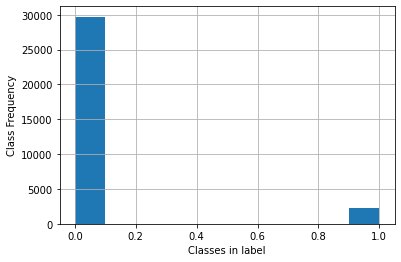

In [21]:
#그래프 그리기
classes.hist()
plt.xlabel("Classes in label")
plt.ylabel("Class Frequency")
plt.show()

In [31]:
# train 데이터중 라벨값이 1인 데이터만 hate_tweet에 저장
hate_tweet = train[ train["label"] == 1 ]

In [32]:
hate_tweet

,tweet,label
13,@user #cnn calls #michigan middle school 'buil...,1
14,no comment! in #australia #opkillingbay #se...,1
17,retweet if you agree!,1
23,@user @user lumpy says i am a . prove it lumpy.,1
34,it's unbelievable that in the 21st century we'...,1
...,...,...
31934,lady banned from kentucky mall. @user #jcpenn...,1
31946,@user omfg i'm offended! i'm a mailbox and i'...,1
31947,@user @user you don't have the balls to hashta...,1
31948,"makes you ask yourself, who am i? then am i a...",1


In [33]:
# train에 tweet컬럼만 저장
tweets = train["tweet"]

In [34]:
tweets[:10] 

0     @user when a father is dysfunctional and is s...
1    @user @user thanks for #lyft credit i can't us...
2                                  bihday your majesty
3    #model   i love u take with u all the time in ...
4               factsguide: society now    #motivation
5    [2/2] huge fan fare and big talking before the...
6     @user camping tomorrow @user @user @user @use...
7    the next school year is the year for exams.ð...
8    we won!!! love the land!!! #allin #cavs #champ...
9     @user @user welcome here !  i'm   it's so #gr...
Name: tweet, dtype: object

In [35]:
type(tweets)

pandas.core.series.Series

In [36]:
# regex 이용해서 문장 내부에 알파벳이 아닌 것들을 공백으로 치환
tweets = tweets.str.replace(r"[^A-Za-z]", " ")
print(tweets[:10])

0      user when a father is dysfunctional and is s...
1     user  user thanks for  lyft credit i can t us...
2                                  bihday your majesty
3     model   i love u take with u all the time in ...
4               factsguide  society now     motivation
5          huge fan fare and big talking before the...
6      user camping tomorrow  user  user  user  use...
7    the next school year is the year for exams    ...
8    we won    love the land     allin  cavs  champ...
9      user  user welcome here    i m   it s so  gr...
Name: tweet, dtype: object


C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_1500/3310962016.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets = tweets.str.replace(r"[^A-Za-z]", " ")


In [37]:
#소문자화
#불용어 처리할때 사전 내부가 전부 소문자라 비교하려면 소문자화 해야함
tweets = tweets.str.lower()

In [38]:
print(tweets[:10])

0      user when a father is dysfunctional and is s...
1     user  user thanks for  lyft credit i can t us...
2                                  bihday your majesty
3     model   i love u take with u all the time in ...
4               factsguide  society now     motivation
5          huge fan fare and big talking before the...
6      user camping tomorrow  user  user  user  use...
7    the next school year is the year for exams    ...
8    we won    love the land     allin  cavs  champ...
9      user  user welcome here    i m   it s so  gr...
Name: tweet, dtype: object


In [39]:
# 영어 불용어 사전 불러오기
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

In [40]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [41]:
# apply 함수는 반복문 대신 사용(빨라서)
# 데이터 프레임에서 반복을 사용할 때 apply 이용함
tweets = tweets.apply(
    lambda x: " ".join( word for word in x.split() if word not in stop_words )
)

In [42]:
#불용어 제거후 tweets
print(tweets[:10])

0    user father dysfunctional selfish drags kids d...
1    user user thanks lyft credit use cause offer w...
2                                       bihday majesty
3                          model love u take u time ur
4                        factsguide society motivation
5    huge fan fare big talking leave chaos pay disp...
6    user camping tomorrow user user user user user...
7    next school year year exams think school exams...
8    love land allin cavs champions cleveland cleve...
9                                 user user welcome gr
Name: tweet, dtype: object


In [30]:
#어근 만들기
ps = nltk.PorterStemmer()
tweets = tweets.apply(
    lambda x: ' '.join( ps.stem(word) for word in x.split() )
)

In [31]:
print(tweets[:10])

0    user father dysfunct selfish drag kid dysfunct...
1    user user thank lyft credit use caus offer whe...
2                                       bihday majesti
3                          model love u take u time ur
4                              factsguid societi motiv
5    huge fan fare big talk leav chao pay disput ge...
6    user camp tomorrow user user user user user us...
7    next school year year exam think school exam h...
8    love land allin cav champion cleveland clevela...
9                                  user user welcom gr
Name: tweet, dtype: object


In [44]:
# 전처리한 데이터들을 Vectorization해주는 과정
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [45]:
# Vectorization하는 과정(내부는 0과 1로 마킹되어 있음)
X = vectorizer.fit_transform(tweets)

In [46]:
#이쁘게 정렬까지 해서 단어들 보기
vectorizer.get_feature_names()

d:\Git\study\nltk\nltk\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aa',
 'aaa',
 'aaaaa',
 'aaaaaand',
 'aaaaah',
 'aaaaand',
 'aaahh',
 'aaahhhh',
 'aaahhhhh',
 'aaand',
 'aaawwwww',
 'aaberg',
 'aadityaji',
 'aah',
 'aakhri',
 'aal',
 'aalivyahsimon',
 'aaliyah',
 'aamaadmipay',
 'aameer',
 'aamirkhan',
 'aande',
 'aap',
 'aapi',
 'aaptards',
 'aarakshan',
 'aarhus',
 'aaron',
 'aaronorentas',
 'aaronrhodes',
 'aarya',
 'aaryn',
 'aascf',
 'aayat',
 'ab',
 'aba',
 'abandoned',
 'abandons',
 'abantu',
 'abasel',
 'abba',
 'abbey',
 'abbibuckets',
 'abbie',
 'abbotabad',
 'abbott',
 'abbu',
 'abby',
 'abbyybelle',
 'abc',
 'abcdiscovers',
 'abd',
 'abdominal',
 'abducted',
 'abe',
 'abeed',
 'abella',
 'abenomics',
 'aberdeen',
 'aberrant',
 'aberystwyth',
 'abetting',
 'abg',
 'abglp',
 'abhi',
 'abhishek',
 'abi',
 'abiding',
 'abilities',
 'ability',
 'abitur',
 'abject',
 'abk',
 'able',
 'ableg',
 'ableism',
 'ablonde',
 'abndp',
 'abo',
 'aboed',
 'aboion',
 'abomination',
 'abou',
 'aboutlastnight',
 'aboutmynextmove',
 'abouttime',
 'abpoli'

In [47]:
# 길이 확인
len(vectorizer.get_feature_names())

37403

In [48]:
# 벡터화 한거 확인
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [49]:
# 트위터의 행이 31962개
# 트위터의 열(자연어 처리이후의 단어개수)
X.shape

(31962, 37403)

In [51]:
# train 데이터의 라벨들
y = train["label"]
y

0        0
1        0
2        0
3        0
4        0
        ..
31957    0
31958    0
31959    0
31960    1
31961    0
Name: label, Length: 31962, dtype: int64

In [52]:
# train과 test의 데이터 분리
from sklearn.model_selection import train_test_split
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, y, test_size=0.25, random_state=42)

In [53]:
# LinearSVC 가져오기
from sklearn.svm import LinearSVC
classifier = LinearSVC()

In [54]:
# 학습시키기
classifier.fit(Train_X, Train_Y)

d:\Git\study\nltk\nltk\lib\site-packages\sklearn\svm\_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [44]:
# 테스트 데이터를 가지고 예측하기
prediction = classifier.predict(Test_X)

In [46]:
# 성능 확인
from sklearn.metrics import accuracy_score, confusion_matrix
print("LinearSVC Accuracy Score is ", accuracy_score( prediction, Test_Y) * 100 )

LinearSVC Accuracy Score is  95.70767113002128


In [47]:
#데이터 프레임으로 확인
pd.DataFrame(
    confusion_matrix(Test_Y, prediction),
    index = [ ["actual", "actual"], ["normal", "Hate"] ],
    columns = [ ["predicted", "predicted"], ["normal", "Hate"] ]
)

predicted     
                 normal Hate
actual normal      7296  136
       Hate         207  352

In [ ]:
#끝